In [1]:
import keras

Using TensorFlow backend.


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from keras.datasets.mnist import load_data
# ((訓練題目, 訓練答案), (測試題目, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
# 一定要做步驟: 看一下訓練資料測試資料有幾筆
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


1


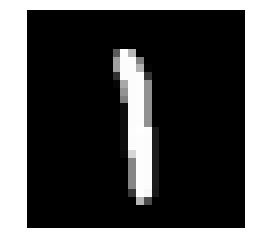

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [6]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 資料預處理
# 1. 題目預處理(Normalize)
# Keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1. 第一種方式: 0 - 1  第二種方式: -1 - 1 
# 攤開 -> Keras MLP 規定一定要攤開成為1D
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# DEMO
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
# 2. 答案預處理(One-hot encoding)
# 希望的樣子: [P0, P1, ..., P9]
# 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 可能輸出: [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: 0
後來: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# 建立模型
# 第一種: 蛋糕支架(Sequential), 堆上一層(Layers)
# Layers: Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層: input_dim->告訴他輸入有幾個
# Param: 784 * 128 + 128(bias) = 100480
mlp.add(Dense(128, activation="relu", input_dim=784))
# Param: 128 * 10(神經元的連結) + 10(10個輸出, 10個激活 -> 10個偏差)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 確定模型訓練方式....等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度, 而有速度的累積)
mlp.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"], 
            optimizer="adam")

In [13]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epoch, 200batch: 60000 * 10 / 200 -> 3000(次)
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15, 
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 2s - loss: 0.0394 - acc: 0.9892 - val_loss: 0.0759 - val_acc: 0.9783
Epoch 2/5
 - 2s - loss: 0.0347 - acc: 0.9912 - val_loss: 0.0767 - val_acc: 0.9797
Epoch 3/5
 - 2s - loss: 0.0300 - acc: 0.9925 - val_loss: 0.0764 - val_acc: 0.9790
Epoch 4/5
 - 2s - loss: 0.0263 - acc: 0.9936 - val_loss: 0.0741 - val_acc: 0.9795
Epoch 5/5
 - 2s - loss: 0.0231 - acc: 0.9948 - val_loss: 0.0784 - val_acc: 0.9783


In [16]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 34us/step


[0.07572518088053912, 0.9768]

In [18]:
# predict: 機率 predict_classes: 分類
pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,969,1,1,1,0,0,3,1,2,2
1,0,1116,4,0,0,1,4,1,9,0
2,4,0,1011,2,1,1,4,2,7,0
3,0,0,8,988,0,6,2,3,3,0
4,1,0,2,0,947,1,7,3,2,19
5,3,0,0,5,1,871,5,1,3,3
6,5,1,0,1,3,4,943,0,1,0
7,1,3,11,1,0,0,0,1001,2,9
8,3,0,4,6,2,5,3,5,939,7
9,2,3,0,5,6,3,0,4,3,983


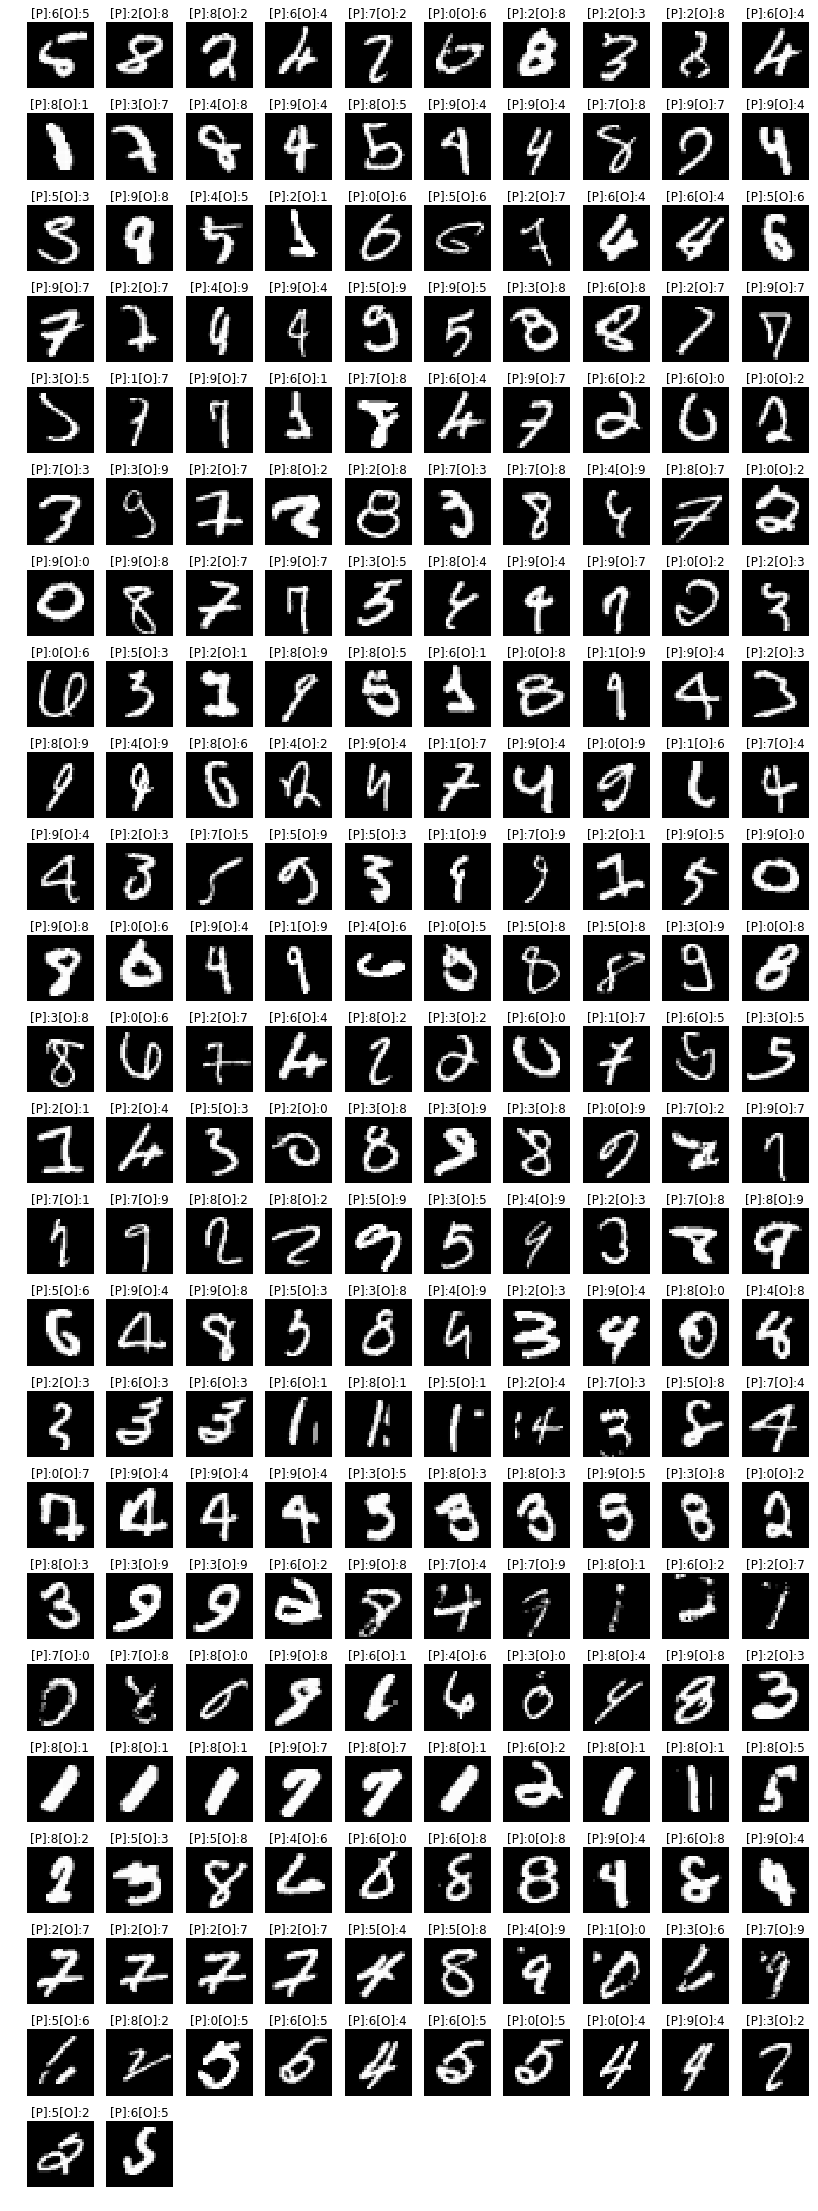

In [39]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
diff = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_test[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(14, 40))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")